            Preprocessing     Technique  k  Silhouette  Calinski-Harabasz  \
0        No Preprocessing        KMeans  3    0.551192         561.593732   
1        No Preprocessing        KMeans  4    0.497643         529.529095   
2        No Preprocessing        KMeans  5    0.493080         495.243414   
3        No Preprocessing  Hierarchical  3    0.554324         558.058041   
4        No Preprocessing  Hierarchical  4    0.488967         515.078906   
5        No Preprocessing  Hierarchical  5    0.484383         488.484904   
6        No Preprocessing     MeanShift  2    0.685788         509.703427   
7           Normalization        KMeans  3    0.482929         351.295064   
8           Normalization        KMeans  4    0.443933         313.892925   
9           Normalization        KMeans  5    0.422704         263.173325   
10          Normalization  Hierarchical  3    0.504800         349.254185   
11          Normalization  Hierarchical  4    0.433036         301.104015   

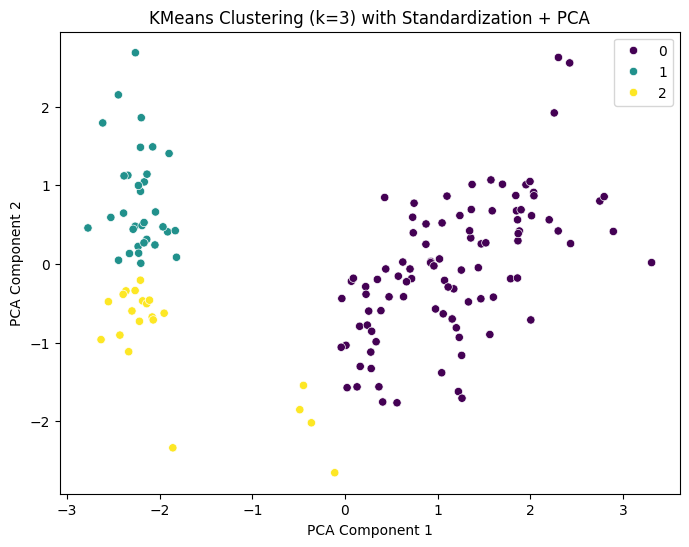

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Load Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Define preprocessing methods
preprocessing_methods = {
    "No Preprocessing": lambda x: x,
    "Normalization": MinMaxScaler(),
    "Standardization": StandardScaler(),
    "PCA": PCA(n_components=2),
    "Standardization + PCA": lambda x: PCA(n_components=2).fit_transform(StandardScaler().fit_transform(x))
}

# Define clustering techniques
clustering_techniques = {
    "KMeans": KMeans,
    "Hierarchical": AgglomerativeClustering,
    "MeanShift": MeanShift
}

# Define evaluation metrics
metrics = {
    "Silhouette": silhouette_score,
    "Calinski-Harabasz": calinski_harabasz_score,
    "Davies-Bouldin": davies_bouldin_score
}

# Function to perform clustering and evaluation
def perform_clustering(X, technique, k=None):
    if technique == "KMeans":
        model = KMeans(n_clusters=k, random_state=42)
    elif technique == "Hierarchical":
        model = AgglomerativeClustering(n_clusters=k)
    elif technique == "MeanShift":
        model = MeanShift()
    labels = model.fit_predict(X)
    if technique == "MeanShift":
        k_found = len(np.unique(labels))
    else:
        k_found = k
    return labels, k_found

# Function to evaluate clustering
def evaluate_clustering(X, labels):
    sil = silhouette_score(X, labels)
    ch = calinski_harabasz_score(X, labels)
    db = davies_bouldin_score(X, labels)
    return sil, ch, db

# Perform analysis
results = []
for prep_name, prep_method in preprocessing_methods.items():
    if callable(prep_method):
        X_prep = prep_method(X)
    else:
        X_prep = prep_method.fit_transform(X)

    for tech_name, tech_class in clustering_techniques.items():
        if tech_name in ["KMeans", "Hierarchical"]:
            for k in [3, 4, 5]:
                labels, k_found = perform_clustering(X_prep, tech_name, k)
                sil, ch, db = evaluate_clustering(X_prep, labels)
                results.append([prep_name, tech_name, k, sil, ch, db])
        elif tech_name == "MeanShift":
            labels, k_found = perform_clustering(X_prep, tech_name)
            sil, ch, db = evaluate_clustering(X_prep, labels)
            results.append([prep_name, tech_name, k_found, sil, ch, db])

# Create DataFrame for results
columns = ["Preprocessing", "Technique", "k", "Silhouette", "Calinski-Harabasz", "Davies-Bouldin"]
df_results = pd.DataFrame(results, columns=columns)

# Display results
print(df_results)

# Visualize clustering results for KMeans with k=3 and Standardization + PCA
X_std_pca = preprocessing_methods["Standardization + PCA"](X)
kmeans = KMeans(n_clusters=3, random_state=42)
labels_kmeans = kmeans.fit_predict(X_std_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_std_pca[:, 0], y=X_std_pca[:, 1], hue=labels_kmeans, palette="viridis")
plt.title("KMeans Clustering (k=3) with Standardization + PCA")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.savefig('kmeans_clustering.png')